# Assignment 9 - Tidy Data + Stastistical Tests

## Instructions

1. Download `last_first_assignment9.ipynb` and fill in the code where indicated to complete the assignment. Feel free to add more cells than provided to try things out, and check what your variables look like, to see if you got the right results. Just make sure you have done what is asked for that question and that you don't delete any code we provide you with.

2. Rename this `last_first_assignment9.ipynb` file replacing `last` and `first` with your name. Make sure all the outputs are there (run each cell) and export the .py file.

3. Submit the .ipynb and .py file to Quercus.

## Questions and Support
1. Please ask class content questions on the class GitHub page: 
https://github.com/BME1478H/Fall2020class/ Expect a processing time of 1d for us to respond. As such, we cannot guarantee we can address your questions and work through all the troubleshooting in time if you ask them the night before or the day of the assignment deadline. Please plan accordingly. 
2. Join a Wednesday Q&A session on Zoom.


Run the following cell to get started. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation

# load in our gapminder dataset
url = 'https://raw.githubusercontent.com/BME1478H/Fall2020class/master/data/world-data-gapminder.csv'
world_data = pd.read_csv(url)

# Task 1 (1 mark)

In the markdown cell below, write the difference between when you would use `df.pivot()` and `df.pivot_table()` where `df` is a dataframe you have loaded. (1 mark)

Answer here (edit cell by double-clicking):
- `df.pivot()` reshapes the dataframe by setting the provided `index` as row indices and the provided `column` as columns, then filling in the dataframe with the given `value`. This means that every `(index, column)` pair must map to a unique value.
- `df.pivot_table` is a generalization of the above that is similar to the pivote tables in spreadsheet programs like Excel used to summarize the table and allows for duplicate values. An aggregate function (`aggfun`) is needed to summarize the values that correspond to the same `(index, column)` pair.



# Task 2 (3.5 marks)

Aggregate and summarize the population size over time from 1970 to 2010. We've subset `world_data` to only include data where the `year` is one of [1970,1980,1990,2000,2010] using the `.isin()` method and stored it in `world_data_decades1970`.

a) Using the `world_data_decades1970` subset, create a `world_data_decades1970_le` dataframe which groups by `region`, `year`, and computes the `mean` of the `life_expectancy` column.
- Don't forget to use `reset_index()` to make it look like a dataframe again. (1 mark)

In [2]:
# run this cell
world_data_decades1970 = world_data[world_data.year.isin([1970,1980,1990,2000,2010])]
world_data_decades1970.head(2)

,country,year,population,region,sub_region,income_group,life_expectancy,income,children_per_woman,child_mortality,pop_density,co2_per_capita,years_in_school_men,years_in_school_women
170,Afghanistan,1970,11100000,Asia,Southern Asia,Low,45.8,1180,7.45,306.0,17.0,0.150,1.36,0.21
180,Afghanistan,1980,13200000,Asia,Southern Asia,Low,43.3,1170,7.45,245.0,20.3,0.133,1.76,0.29


In [5]:
# 2a answer here 0.5 marks
world_data_decades1970_le = world_data_decades1970.groupby(["region", "year"])["life_expectancy"].mean().reset_index()

# keep this here to preview the dataframe
world_data_decades1970_le.head()

,region,year,life_expectancy
0,Africa,1970,51.219231
1,Africa,1980,54.765385
2,Africa,1990,56.665385
3,Africa,2000,56.178846
4,Africa,2010,60.596154


b) Using `world_data_decades1970_le` dataframe and `pivot()` to pivot the table from 'long' to 'wide' format with one row per `region`, and one column per decade in `years`, and where each cell contains have the `mean` of `life_expectancy` (which you have already calculated). Store in `decades1970_pivot`. (0.5 marks)

In [6]:
# 2b answer here 0.5 marks
decades1970_pivot = world_data_decades1970_le.pivot(index="region", columns="year", values="life_expectancy")

# keep this here to preview the dataframe
decades1970_pivot

year,1970,1980,1990,2000,2010
region,,,,,
Africa,51.219231,54.765385,56.665385,56.178846,60.596154
Americas,63.467742,68.022581,70.822581,72.716129,73.674194
Asia,58.376596,62.993617,66.974468,69.102128,72.570213
Europe,70.335897,72.030769,73.594872,74.994872,77.497436
Oceania,62.920000,65.340000,66.670000,67.970000,69.240000


c) Start from `world_data_decades1970` and use `pivot_table()` to do the same thing you did in (a) and (b) but in one step. (0.5 marks) 
Store the result in `decades1970_pivottable`. 

In [8]:
# 2c answer here 0.5 marks
decades1970_pivottable = world_data_decades1970.pivot_table(index="region", columns="year", values="life_expectancy", aggfunc=np.mean)


# keep this here to preview the dataframe
decades1970_pivottable

year,1970,1980,1990,2000,2010
region,,,,,
Africa,51.219231,54.765385,56.665385,56.178846,60.596154
Americas,63.467742,68.022581,70.822581,72.716129,73.674194
Asia,58.376596,62.993617,66.974468,69.102128,72.570213
Europe,70.335897,72.030769,73.594872,74.994872,77.497436
Oceania,62.920000,65.340000,66.670000,67.970000,69.240000


d) Again, start from `world_data_decades1970` and use `pivot_table()` to do the same thing you did in (c) but use it to find the `median` of the `life_expectancy` instead of the `mean`. (0.5 marks)  
Set `margins=True` to draw the borders in each cell.  
Store the result in `decades1970_pivottable_median`.   
Hint: you can change the aggregation function of `pivot_table()` by setting the parameter `aggfunc=function_you_want`.

In [9]:
# 2d answer here
decades1970_pivottable_median = world_data_decades1970.pivot_table(index="region", columns="year", values="life_expectancy", aggfunc=np.median, margins=True)


# keep this here to preview the dataframe
decades1970_pivottable_median

year,1970,1980,1990,2000,2010,All
region,,,,,,
Africa,50.9,54.75,55.25,54.45,59.8,55.00
Americas,65.4,69.20,71.50,74.20,75.4,71.30
Asia,61.2,64.90,68.20,70.70,72.8,67.20
Europe,70.1,71.70,74.30,75.90,79.5,73.50
Oceania,64.8,65.40,66.65,66.55,67.6,65.35
All,62.2,66.00,69.20,70.70,72.8,67.90


e) We subset `world_data` for you in `subset_2e` to include the columns `children_per_woman` and `child_mortality` for the year 1970. (0.5 marks)

In a variable called `subset_melted`, use `subset_2e` to turn the data from 'wide' to 'long' format such that `country` and `year` columns are still kept intact, and the `children_per_woman` and `child_mortality` columns are indicated under the 'variable' column. 

In [10]:
# run this cell
subset_2e = world_data[world_data.year == 1970][['country', 'year', 'children_per_woman', 'child_mortality']]
subset_2e.head(2)

,country,year,children_per_woman,child_mortality
170,Afghanistan,1970,7.45,306.0
389,Albania,1970,4.91,126.0


In [11]:
# 2e answer here
subset_melted = subset_2e.melt(id_vars=['country', 'year'], value_vars=['children_per_woman', 'child_mortality'])

# keep this code here to check the result
subset_melted.head()

,country,year,variable,value
0,Afghanistan,1970,children_per_woman,7.45
1,Albania,1970,children_per_woman,4.91
2,Algeria,1970,children_per_woman,7.64
3,Angola,1970,children_per_woman,7.60
4,Antigua and Barbuda,1970,children_per_woman,3.68


___
Hint: when you have a dataframe called `df` and you're using `df.melt(id_vars=['column1', 'column2'], value_vars=['column3', 'column4'])`, the `id_vars` argument indicates which columns to keep as identifiers/kept intact, and the `value_vars` argument indicates which will be 'melted' into the 'variable' column and the value for those variables indicated the 'value' column. 
___

f) Since the year is always 1970, it is not so useful to display the `year` column. Do the same as you did in 2(e) and set either the `id_vars` and/or `value_vars` in `melt()` such that `year` is not included and store in `subset_melted_2`. (0.5 marks)
- DO NOT create your melted dataframe and then subset the columns at the end to exclude 'year' i.e. `df.loc['country', 'variable', 'value']`, this will NOT be given full marks.

In [12]:
# 2f answer here
subset_melted_2 = subset_2e.melt(id_vars=['country'], value_vars=['children_per_woman', 'child_mortality'])

# keep this code here to check the result
subset_melted_2.head()

,country,variable,value
0,Afghanistan,children_per_woman,7.45
1,Albania,children_per_woman,4.91
2,Algeria,children_per_woman,7.64
3,Angola,children_per_woman,7.60
4,Antigua and Barbuda,children_per_woman,3.68


___
# Task 3 (3.5 marks)
Let's test whether the `life_expectancy` in the `Americas` or `Asia` region of the world changed between 1970 to 2000. We've already subset the data for you.

a) Using `amer_asia_1970_2000` which we created for you below, create two variables called `le_asia_1970` and `le_amer_1970` which only contain the `life_expectancy` values for the year `1970` in rows where the `region` is `Asia` or `Americas`, respectively (1 mark).

(i.e. `le_asia_1970` only has `life_expectancy` for `1970` for `Asia` and `le_amer_1970` only has `life_expectancy` for `1970` for `Americas`)

In [13]:
# run this cell to get started
import pandas as pd
import seaborn as sns
from scipy import stats

world_data_decades1970 = world_data[world_data.year.isin([1970,1980,1990,2000,2010])] 

amer_asia_1970_2000 = world_data_decades1970[world_data_decades1970.region.isin(['Asia','Americas']) &
                                                  world_data_decades1970.year.isin([1970,2000])]
amer_asia_1970_2000.head(2)

,country,year,population,region,sub_region,income_group,life_expectancy,income,children_per_woman,child_mortality,pop_density,co2_per_capita,years_in_school_men,years_in_school_women
170,Afghanistan,1970,11100000,Asia,Southern Asia,Low,45.8,1180,7.45,306.0,17.0,0.1500,1.36,0.21
200,Afghanistan,2000,20100000,Asia,Southern Asia,Low,51.6,972,7.49,130.0,30.8,0.0385,2.90,0.59


In [16]:
# 3a answer here 1 mark
le_asia_1970 = amer_asia_1970_2000.loc[(amer_asia_1970_2000["year"] == 1970) & (amer_asia_1970_2000["region"] == "Asia"), "life_expectancy"]
le_amer_1970 = amer_asia_1970_2000.loc[(amer_asia_1970_2000["year"] == 1970) & (amer_asia_1970_2000["region"] == "Americas"), "life_expectancy"]


# keep this code here to check our results
print(le_asia_1970.head())
print(le_amer_1970.head())

170     45.8
1484    65.5
2141    61.2
2579    64.8
2798    44.0
Name: life_expectancy, dtype: float64
1046    66.8
1265    65.4
2360    64.8
3017    69.3
3674    66.5
Name: life_expectancy, dtype: float64


___
Hint: Don't forget when you are filtering your data by multiple criterion, it is useful to wrap your boolean statements/criteria (e.g. `df['columnname'] == 50'`) in `(` `)` and use `&` (and), `|` (or) to specify the logic.

For example:

`df.loc[(df.column_1 > 10) & (df.column_2 < 100)]` will select rows where `column_1` is greater than 10 AND `column_2` is less than 100. 
___

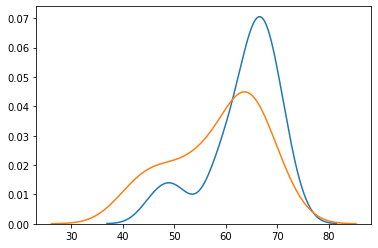

In [17]:
# run this cell to visualize the distribution of life_expectancy in the Asia/America in 1970
sns.kdeplot(le_amer_1970, legend=False)
sns.kdeplot(le_asia_1970, legend=False)

b) The distributions sure look different, but let's use a t-test to statistically test the difference. Using `stats.ttest_ind()` run a t-test which compares the `life_expectancy` values in the `le_asia_1970` and `le_amer_1970`. Store in `ttest_le`. (0.5 marks)

In [35]:
# 3b answer here 0.5 marks
ttest_le = stats.ttest_ind(le_amer_1970, le_asia_1970, equal_var=True)
# Note that the t-test is statistically unsound here because
# both distribution are not normally distributed based on the
# p-valud produced by `stats.shapiro`. Though ff we assume that 
# both distributions are normal, then we may assume equal 
# variance given `stats.levene` and `stats.bartlett`.


# keep here to inspect result
print(ttest_le.statistic)
print(ttest_le.pvalue)

2.7007051976198375
0.00852661554599716


c) Based on a *p-value* threshold of 0.05, would you reject the null-hypothesis that the means of the distributions are the same (i.e. that they are indeed different)? (0.5 marks)

Answer here (double-click to edit this cell):

("yes" or "no")

*Yes (null-hypothesis rejected with t-test p = 0.009 < 0.05)*

d) We might want to know if the `life_expectancy` has changed from 1970 to 2000, and since it's the same region over time, the variables are paired or related. 

Starting with `amer_asia_1970_2000`, extract the values necessary to run a paired/repeated-measures t-test (`stats.ttest_rel()`) on `life_expectancy` in `Asia` in `1970` compared to `2000` and store in `ttest_le_asia`. 

We've named the variables for you, please do not change them. (1 mark)

In [76]:
# 3d answer here, 1 mark

# asia_1970 = amer_asia_1970_2000.loc[(amer_asia_1970_2000["year"] == 1970) & (amer_asia_1970_2000["region"] == "Asia"), "life_expectancy"]
# asia_2000 = amer_asia_1970_2000.loc[(amer_asia_1970_2000["year"] == 2000) & (amer_asia_1970_2000["region"] == "Asia"), "life_expectancy"]

# To make sure that the data is indeed paired 
# irrespective of the original order in `amer_asia_1970_2000`, 
# create a pivot table
aa_pivot = amer_asia_1970_2000[amer_asia_1970_2000["region"] == "Asia"].pivot(index="country", columns="year", values="life_expectancy")
asia_1970 = aa_pivot.loc[:, 1970]
asia_2000 = aa_pivot.loc[:, 2000]

ttest_le_asia = stats.ttest_rel(asia_1970, asia_2000)
# Note again that t-test is unsound statistically here because
# `stats.shapiro(asia_2000 - asia_1970)` rejects that the 
# paired differences are normally distributed

print(ttest_le_asia.statistic)
print(ttest_le_asia.pvalue)

# sns.distplot( asia_2000 - asia_1970 )

-11.599032384697498
2.9607163875131743e-15


WilcoxonResult(statistic=3.0, pvalue=2.9071463249635787e-09)

e) Based on a *p-value* threshold of 0.05, would you reject the null-hypothesis that the means of the life expectancy in Asia in 1970 vs 2000 are the same (i.e. that they are indeed different)? (0.5 marks)

**Note:** the values in scientific notation like `1.89102e-6` means the decimal is actually 6 placed to the right of where it's shown (i.e. `0.00000189102`)

Answer here (double-click to edit this cell):

("yes" or "no")

*Yes (null-hypothesis rejected with paired t-test p = 3e-15 < 0.05)*